# Brest Cancer Diagnostic

## Assignment: 1, Software Arch. of AI

## Business Case: 
This ML project can be used in any medical application to decide whether the brest cancer is of type `benign` or `malignant`.

## First thing first : Set up the environment

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

## Load our data-set
## Dataset is taken from: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download

In [2]:
df = pd.read_csv('data.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## Data Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

From Data-Statistics, we can say that Unnamed: 32 is of no use. In addition, we can drop id column as well. Hence, dropping two columns as follow.

In [4]:
df = df.drop(columns=['id', 'Unnamed: 32'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

We will also replace `M` and `B` value with 0 and 1 respectively. Thus we will have Dtype `int32` instead of `object`. The below operation is a part of `Data-preprocessing`. However, the reason to convert the value is nothing but to make sure all the values are in numbers.

In [5]:
df = df.replace(['M','B'],[0,1])
df['diagnosis'] = df['diagnosis'].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.627417    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      1.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [8]:
df.shape

(569, 31)

# Data Visualisation


## 1.)Count plot

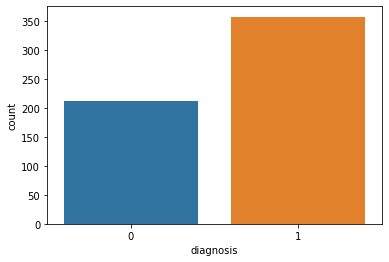

In [9]:
sns.countplot(df["diagnosis"])

Here, we can see imbalance in our dataset. About 220 readings are of `M` type and remaining readings are of `B` type. 

## 2.) Correlation Matrix

In [10]:
cor = df.corr()
fig = plt.figure(figsize=(36,36), dpi = 480)
sns.heatmap(cor,annot=True, cmap=plt.cm.Reds, fmt = '.2f') #Plot Feature correlation

We got highest negative correlation values of `0.78` and `0.79`. We got highest positive correlation of `0.07` only.

## 3.) Correlation in terms of barplot

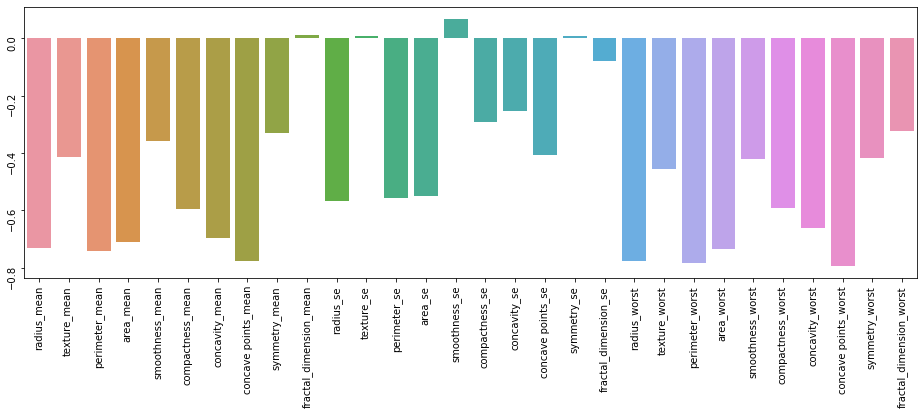

In [11]:
df_new = df.drop(['diagnosis'],axis=1)
plt.figure(figsize = (16,5))
ax = sns.barplot(df_new.corrwith(df.diagnosis).index, df_new.corrwith(df.diagnosis))
ax.tick_params(labelrotation = 90)

Above figure clearly specify the relations between each-parameter with `diagnosis`. This gives similar result like correlation matrix. We just got better visualization.

## 4.) Box-plot
## Reference on how to drow box-plot is taken from: https://www.kaggle.com/code/anikkumar/breast-cancer-for-beginners-accuracy-98

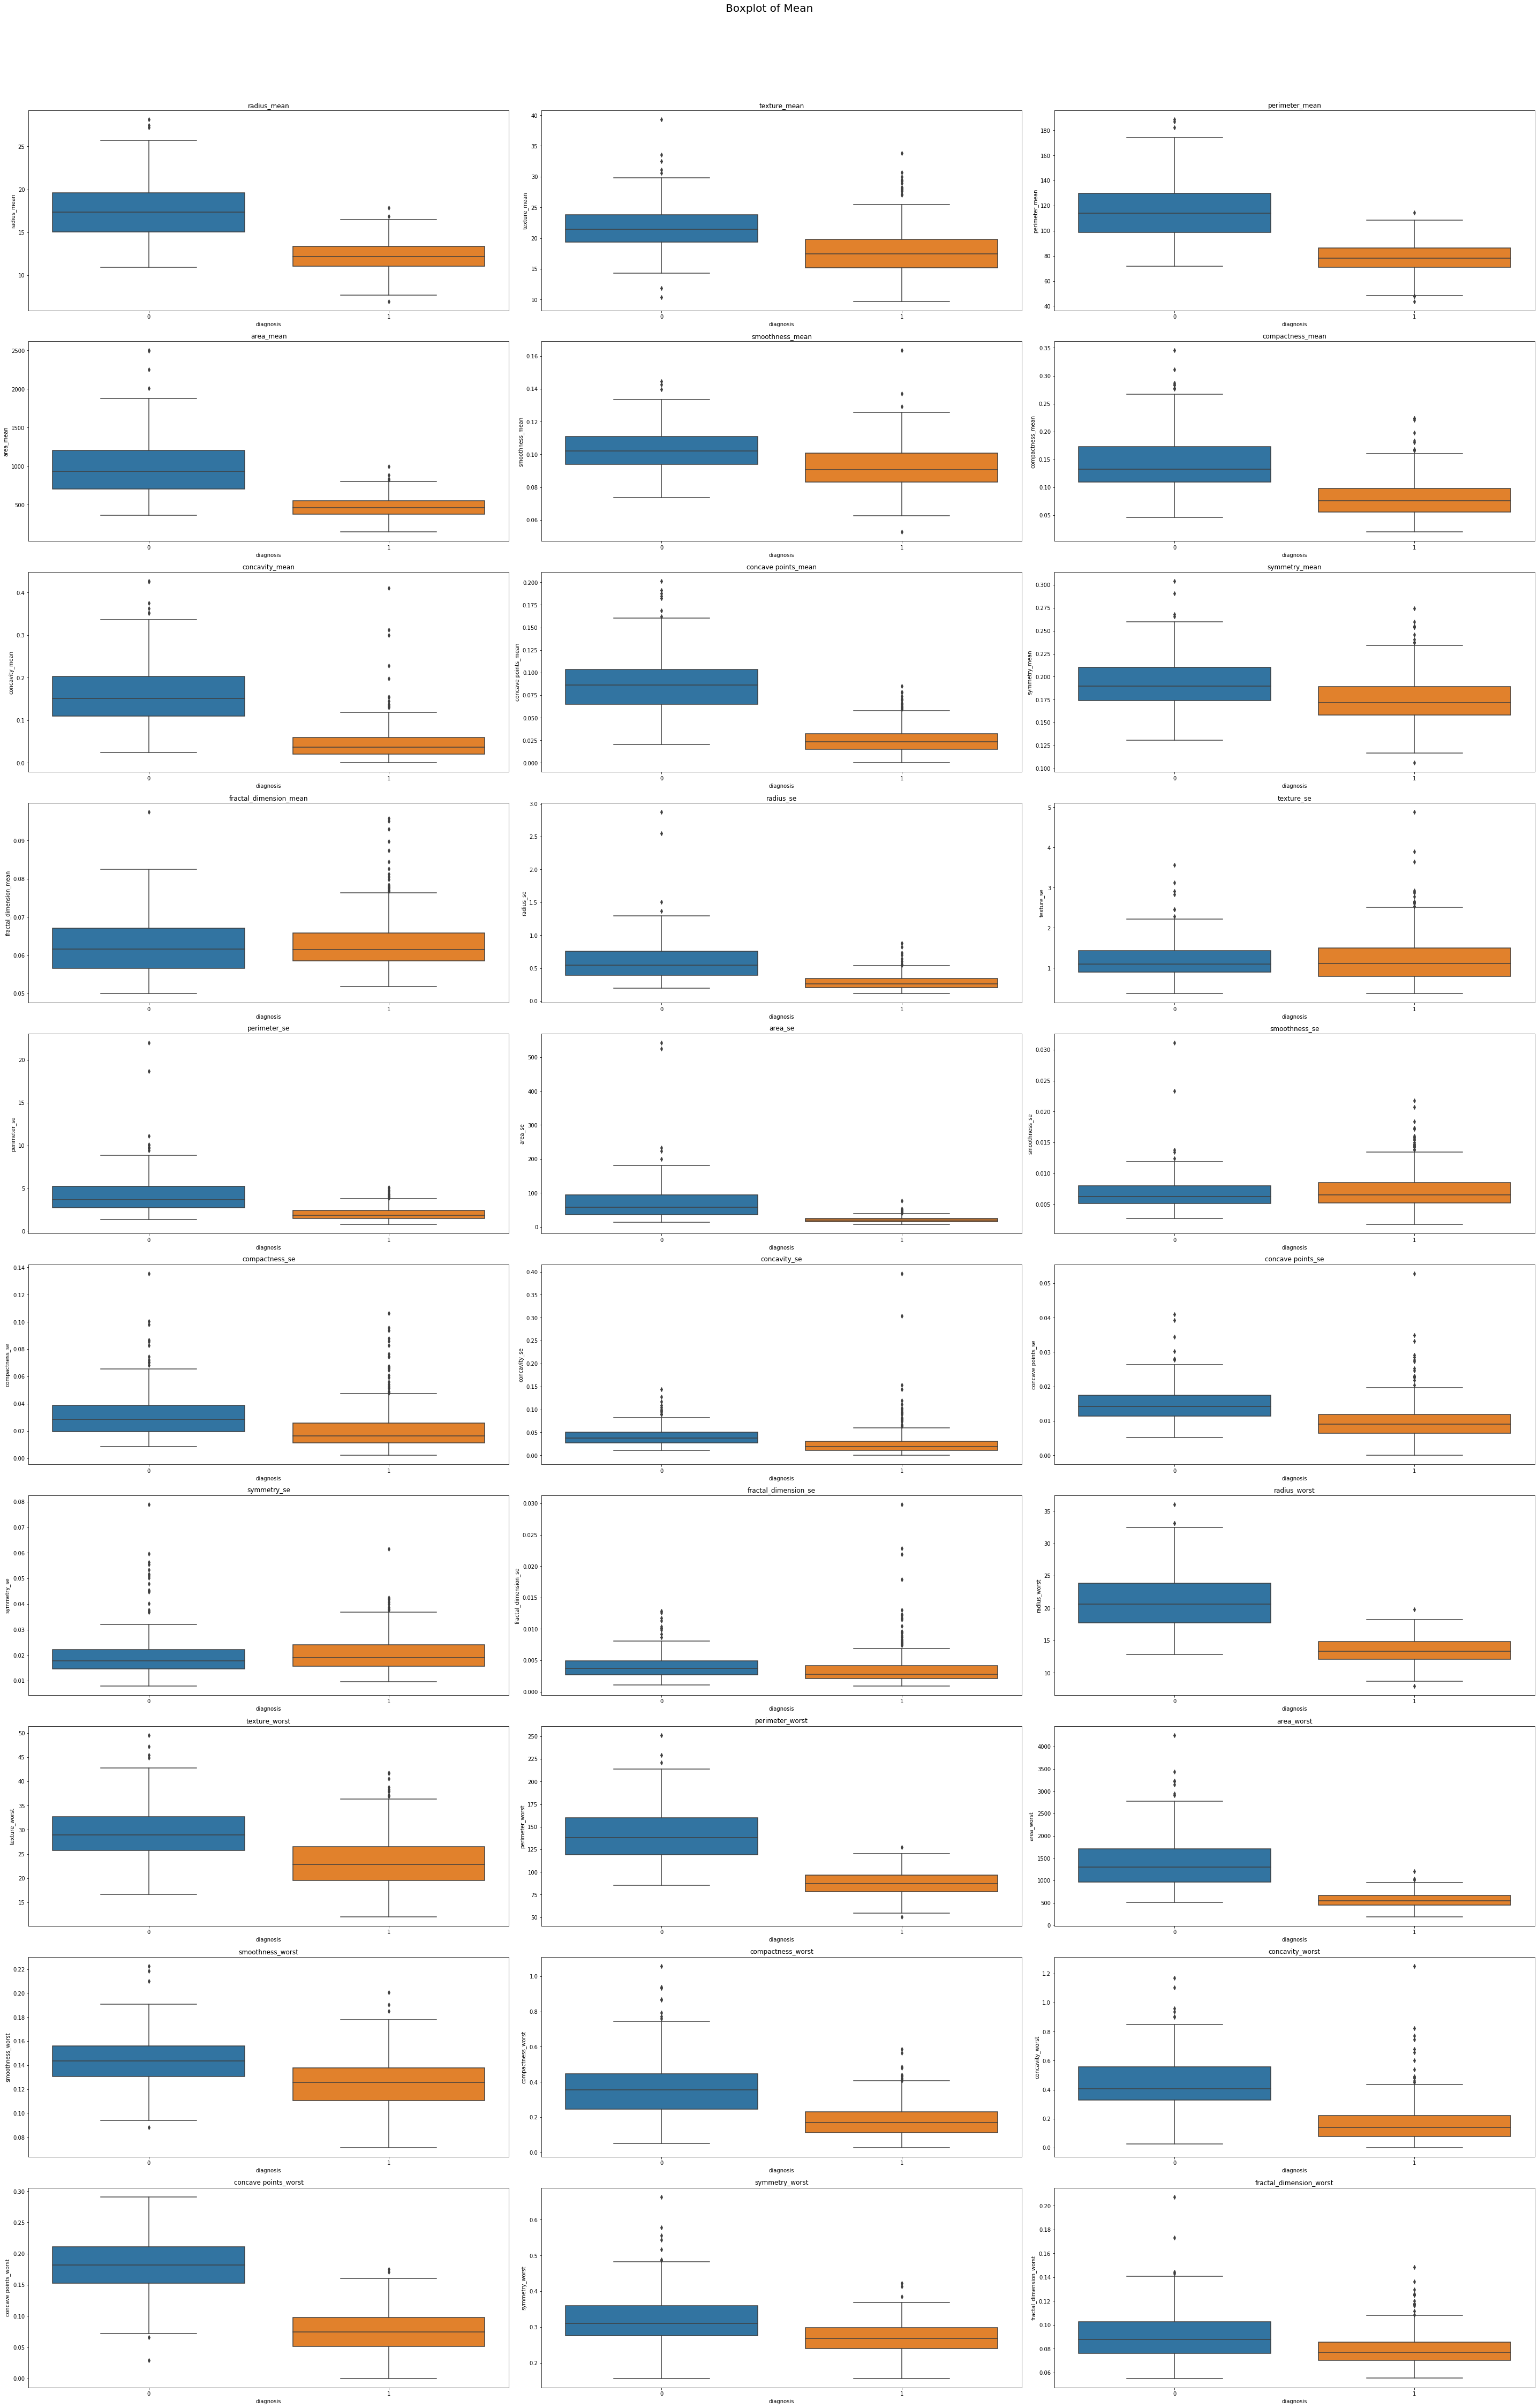

In [12]:
fig = plt.figure(figsize = (40,60),tight_layout=True)
for i,b in enumerate(list(df.columns[1:31])):
    i = i + 1
    ax = fig.add_subplot(10,3,i)
    sns.boxplot(x=df['diagnosis'], y=b, data=df)
    ax.set_title(b)
plt.suptitle('Boxplot of Mean', y=1.04, size=20)
plt.tight_layout()
plt.show()

We can make a conclusion, that box-plot gave low average value for `1` than `0`. It means, `benign` has lower average value than `malignant`.

## 5.) Heatmap of our data-set

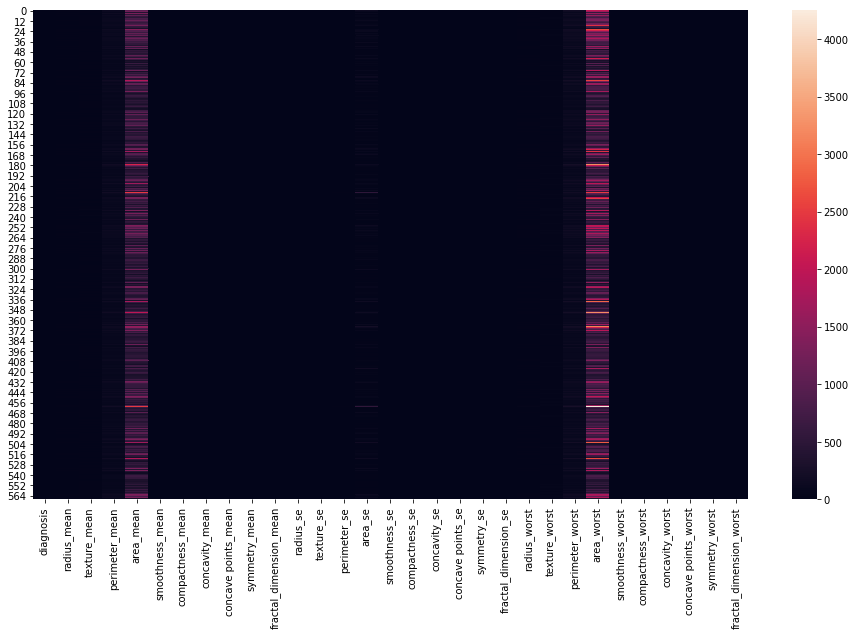

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(df)

## Data Pre-processing

In [14]:
X = df.drop(['diagnosis'],axis = 1)
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [15]:
y = df['diagnosis']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int32

We will split dataset into `train` and `test` dataset.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

## Feature Engineering

We will use `Standard Scaler` to convert different units into a single one.

In [17]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## We will now fit Different algorithms on our data-set

Here, we are working on classification problem, which is basically `binary classification`. Thus, we can use algorithms accordingly. 

## SVM

Initially, we will perform SVM on raw data-set. The, we will fit the same algorithm on scaled data. We will then check the accuracy and we will check the difference.

In [18]:
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.935672514619883

In [19]:
svm_classifier = svm.SVC()
svm_classifier.fit(X_train_sc, y_train)
y_pred = svm_classifier.predict(X_test_sc)
accuracy_score(y_test,y_pred)

0.9766081871345029

As we can see, accuracy on `scaled data` is higher than accuracy on `raw data`.

We will perform the same operation on every algorithms as we performed above.

## Decision Tree

In [20]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)
y_pred = dt_classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.935672514619883

In [21]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_sc,y_train)
y_pred = dt_classifier.predict(X_test_sc)
accuracy_score(y_test,y_pred)

0.9415204678362573

In decision tree as well, we get the same trend of getting better accuracy on scaled data over raw data.

## Random Forest Classifier

In [22]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.9649122807017544

In [23]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_sc,y_train)
y_pred_sc = rf_classifier.predict(X_test_sc)
accuracy_score(y_test,y_pred_sc)

0.9707602339181286

Among all of the classifier, we got highest accuracy on `SVM` classifier. Thus, we will choose this model as our final model.

## Model Evaluation

In [24]:
svm_classifier = svm.SVC()
svm_classifier.fit(X_train_sc, y_train)
y_pred = svm_classifier.predict(X_test_sc)
accuracy_score(y_test,y_pred)
print('Classification report\n',classification_report(y_test, y_pred))

Classification report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



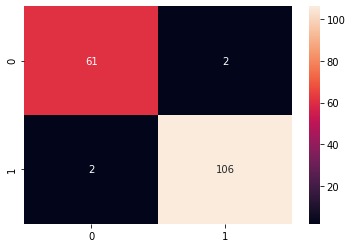

In [25]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,annot=True,fmt="d")

At a first glance, we can say that our algorithm worked really well. However, if we check the `confusion matrix`, we have 2 `FP` and 2 `FN`.
The meaning of `FP` is nothing but our algorithm has predicted that person has serious brest cancer, eventhough she does not have. By performing proper checkup, doctor can identify the true result.
However, in case of `FN`, our algorithm just predicted that person does not have sever brest cancer. Although, she does have. This is where we have to rely on another approach for better result. This may include perfroming test with other applications as well or we can improve algorithm as well.

In [29]:
#define a grid of hyperparameter values
svm_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000 ],
              'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
              'kernel': ['rbf']}

svm_cv = GridSearchCV(estimator=svm.SVC(), 
                     param_grid=svm_grid, 
                     refit='auc',cv = StratifiedKFold(n_splits=5))
svm_cv.fit(X_train, y_train)
svm_cv.cv_results_
svm_cv.best_params_

{'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}

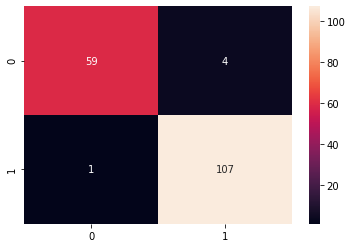

In [32]:
#Initialize the classifier with the best parameters
svm_classifier = svm.SVC(C = 100,gamma = 1e-05, kernel = 'rbf').fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,annot=True,fmt="d")

Here, even with the best parameter, we got one `FN`. However, if we use `1e-06` instead of `1e-05`, then we can have the result shown below.

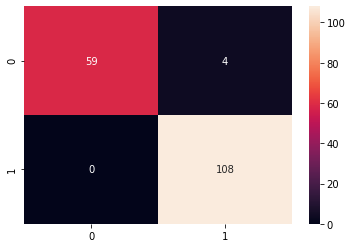

In [33]:
svm_classifier = svm.SVC(C = 100,gamma = 1e-06, kernel = 'rbf').fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,annot=True,fmt="d")

Above model can be used in practice. However, there is a slight chance that this model may be overfitted in data-set. However, that can be seen only on unseen data.

In [34]:
accuracy_score(y_test,y_pred)
print('Classification report\n',classification_report(y_test, y_pred))

Classification report
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        63
           1       0.96      1.00      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



The score of the model is also listed as above. This is something valid model and hence, we may use this model.